<a href="https://colab.research.google.com/github/RaihanHeggi/markov_chain_ddos_attack/blob/main/Entropy_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np
from scipy.stats import entropy
from math import log, e
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

# **Decision Tree**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RaihanHeggi/markov_chain_ddos_attack/main/semi_processed_train.csv', sep=',')
df_2 = pd.read_csv('https://raw.githubusercontent.com/RaihanHeggi/markov_chain_ddos_attack/main/dataset_sdn.csv', sep=';')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(1)

,dt,switch,pktcount,bytecount,dur,dur_nsec,flows,packetins,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,0.996744,0.96243,0.0,1.0,0.5,0.113329,0.000003,0.0


In [3]:
df.shape

(94797, 18)

In [4]:
#Changing Protocol Value

df['Protocol'] = df_2['Protocol'] 
df['Protocol'] = df['Protocol'].replace('UDP', 1)
df['Protocol'] = df['Protocol'].replace('TCP', 2)
df['Protocol'] = df['Protocol'].replace('ICMP', 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [5]:
#memastikan data tidak berubah

df.shape

(94797, 18)

### **Split X and Y**

In [6]:
x = df[df.columns[:17]]
y = df['label']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

## **Make Classifier**

In [8]:
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

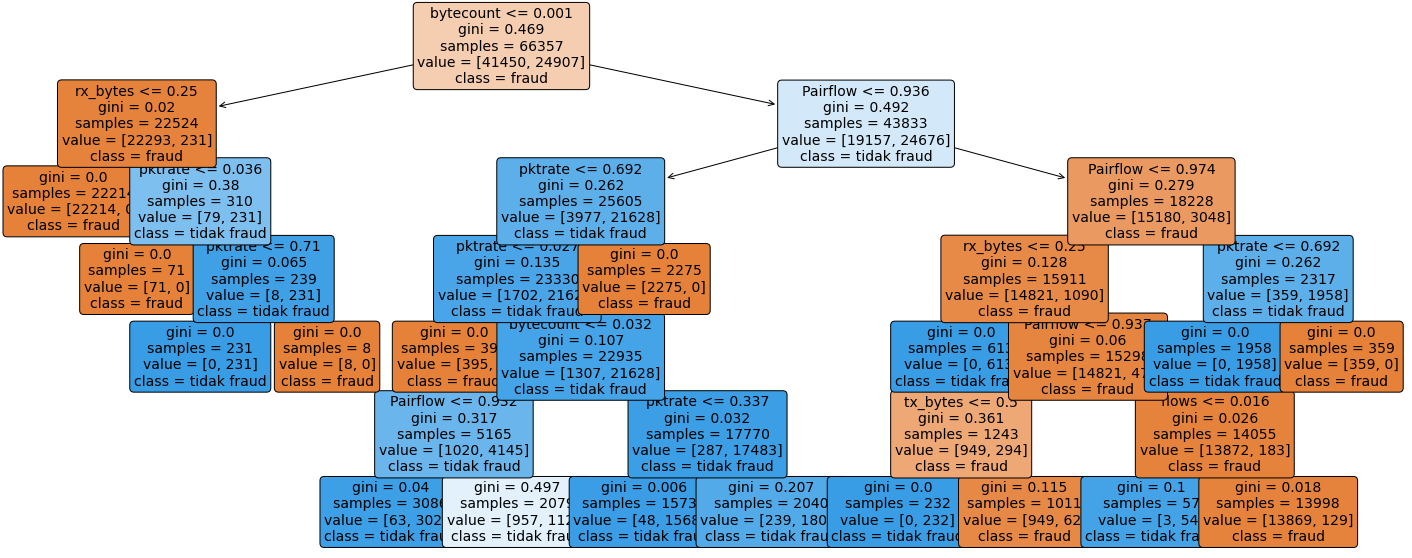

In [9]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=X_train.columns, 
              class_names=['fraud','tidak fraud'],
              filled=True, 
              rounded=True, 
              fontsize=14)

## **Prediction Steps**

In [10]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

Data Training

In [11]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)

[[40140  1310]
 [  191 24716]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     41450
         1.0       0.95      0.99      0.97     24907

    accuracy                           0.98     66357
   macro avg       0.97      0.98      0.98     66357
weighted avg       0.98      0.98      0.98     66357

Accuracy: 97.73799297737993


Data Test

In [12]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[17274   567]
 [   75 10524]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     17841
         1.0       0.95      0.99      0.97     10599

    accuracy                           0.98     28440
   macro avg       0.97      0.98      0.98     28440
weighted avg       0.98      0.98      0.98     28440

Accuracy: 97.74261603375527


# **Entropy Calculation**

In [13]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

In [14]:
print("Nilai Entropy dari Kolom")
for i in range(1,17):
  entropy_value = entropy1(df[df.columns[i]])
  print(df.columns[i]," : ",entropy_value)

Nilai Entropy dari Kolom
switch  :  2.0505603249958244
pktcount  :  8.477057584542024
bytecount  :  8.50101352853958
dur  :  6.416825927001161
dur_nsec  :  6.831919872032201
flows  :  7.017595416805229
packetins  :  2.169674575313902
pktrate  :  4.227698337839184
Pairflow  :  5.360442367337688
Protocol  :  1.0971609428567426
port_no  :  3.917346727833653
tx_bytes  :  0.6400229067018461
rx_bytes  :  1.0730391402231954
tx_kbps  :  1.4121837495145697
rx_kbps  :  8.818519764224686
tot_kbps  :  8.30333595153074


In [17]:
df_test = df.head(10)
df_test

,dt,switch,pktcount,bytecount,dur,dur_nsec,flows,packetins,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.50,1.133295e-01,3.090061e-06,0.0
1,0.225406,0.0,0.486123,0.915781,0.148857,0.734735,0.149468,0.000000,0.076883,0.962304,1,0.96243,0.0,1.0,0.75,1.035450e-06,2.689292e-06,0.0
2,0.220956,0.0,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,1,0.96243,0.0,1.0,0.25,9.141880e-07,6.420382e-07,0.0
3,0.220956,0.0,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,1,0.96243,0.0,1.0,0.00,9.984414e-07,5.511837e-07,0.0
4,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.00,9.826931e-07,6.420382e-07,0.0
5,0.220956,0.0,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,1,0.96243,0.0,1.0,0.75,2.792018e-01,3.471650e-06,0.0
6,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.00,1.196870e-06,1.452922e-01,0.0
7,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.25,4.573386e-01,1.746425e-06,0.0
8,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.25,9.984414e-07,5.511837e-07,0.0
9,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,1,0.96243,0.0,1.0,0.25,9.984414e-07,6.420382e-07,0.0


In [23]:
for x, y in df_test.iterrows():
  entropy_value = entropy1(y.values)
  print(x," : ",entropy_value)
  #ada batas entropy yang diinginkan dan kemudian untuk patokan benign atau malign

0  :  2.6302533563892636
1  :  2.505289990918417
2  :  2.6302533563892636
3  :  2.505289990918417
4  :  2.505289990918417
5  :  2.6302533563892636
6  :  2.505289990918417
7  :  2.6302533563892636
8  :  2.6302533563892636
9  :  2.6302533563892636
